# Breadth First Search
Initialize the queue with the start city, path, and cost.

Explore each city by dequeuing it, checking if it's the goal city.

If it’s not the goal city, mark it as visited and enqueue all unvisited neighboring cities along with the updated path and cost.

Continue this process until either the goal is found or the queue becomes empty (meaning no path exists).

BFS ensures that the first time we reach the goal city, it is through the shortest path (in terms of the number of edges) since BFS explores cities 
level by level.

# Depth First Search
The stack is initialized with the starting city, its path, and a cost of 0.

The algorithm enters a loop that pops cities (nodes) from the stack and explores each.

If the current city is the goal city, it prints and returns the path and cost.

If not, the current city is marked as visited, and all unvisited neighboring cities are pushed onto the stack along with their updated paths and costs.

DFS continues exploring deeply down each path before backtracking when it hits a dead end.

If no path is found, the function returns None and an infinite cost.

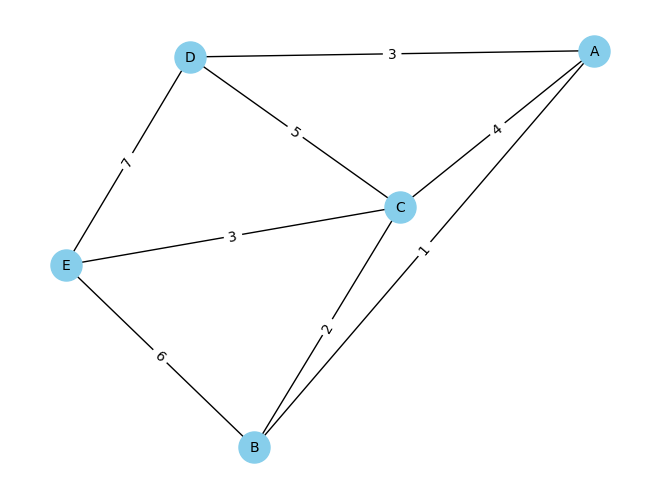

BFS found the goal E with path: ['A', 'B', 'E'] and cost: 7
DFS found the goal E with path: ['A', 'D', 'E'] and cost: 10
BFS Path: ['A', 'B', 'E'], Cost: 7


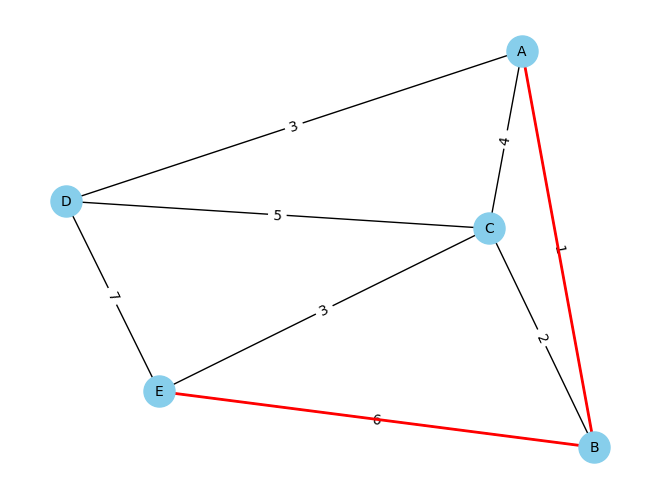

DFS Path: ['A', 'D', 'E'], Cost: 10


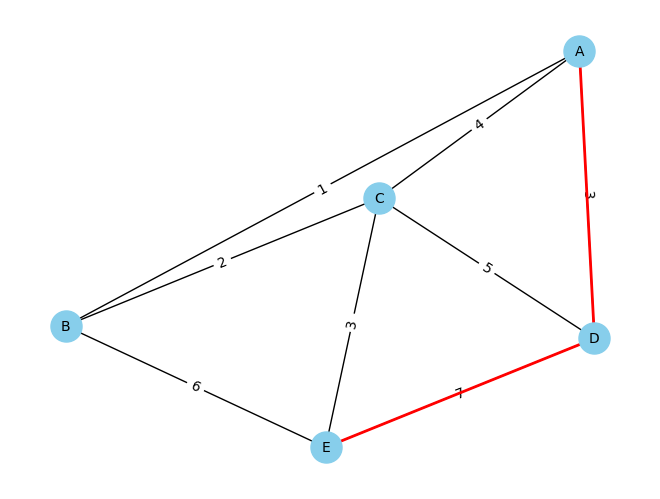

In [1]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph for cities and distances
graph = {
    'A': [('B', 1), ('C', 4), ('D', 3)],
    'B': [('A', 1), ('C', 2), ('E', 6)],
    'C': [('A', 4), ('B', 2), ('D', 5), ('E', 3)],
    'D': [('A', 3), ('C', 5), ('E', 7)],
    'E': [('B', 6), ('C', 3), ('D', 7)]
}

# Helper function to visualize the graph
def visualize_graph(graph, path=None):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
    
    if path:
        edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')
    plt.show()

# Breadth-First Search (BFS)
def bfs(graph, start, goal):
    queue = deque([(start, [start], 0)])  # (current_node, path, cost)
    visited = set()
    
    while queue:
        node, path, cost = queue.popleft()
        if node == goal:
            print(f"BFS found the goal {goal} with path: {path} and cost: {cost}")
            return path, cost
        
        if node not in visited:
            visited.add(node)
            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor], cost + weight))
    
    return None, float('inf')

# Depth-First Search (DFS)
def dfs(graph, start, goal):
    stack = [(start, [start], 0)]  # (current_node, path, cost)
    visited = set()
    
    while stack:
        node, path, cost = stack.pop()
        if node == goal:
            print(f"DFS found the goal {goal} with path: {path} and cost: {cost}")
            return path, cost
        
        if node not in visited:
            visited.add(node)
            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor], cost + weight))
    
    return None, float('inf')

# Visualize the graph initially
visualize_graph(graph)

# Perform BFS and DFS
bfs_path, bfs_cost = bfs(graph, 'A', 'E')
dfs_path, dfs_cost = dfs(graph, 'A', 'E')

# Visualize BFS and DFS paths
print(f"BFS Path: {bfs_path}, Cost: {bfs_cost}")
visualize_graph(graph, bfs_path)

print(f"DFS Path: {dfs_path}, Cost: {dfs_cost}")
visualize_graph(graph, dfs_path)

# Time Complexity: BFS - O(b^d), DFS - O(b^d)
# where b is the branching factor and d is the depth of the search tree
